In [1]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3

import SMaRT.MacUtils as mut
reload(mut)

<module 'SMaRT.MacUtils' from '/booleanfs2/sahoo/BoNE/SMaRT/MacUtils.py'>

<a id="TOC"></a>
## Alzheimer's Disease Analysis
[Training](#training) <br>
[BoNE](#bone) <br>
[Test](#test_1)

In [2]:
import bone
reload(bone)
import Datasets
reload(Datasets)

<module 'Datasets' from '/mnt/booleanfs2/sahoo/Data/Brain/Alz-Net/ADNet/Datasets.py'>

<a id="training"></a>
## Training
[BoNE](#bone) <br>
[Test](#test_1) <br>
[Return](#TOC)

In [3]:
import bone
reload(bone)
hu = bone.hu
nodes, edges = bone.BIGraph.readEqGraph("results/ad-net-1-res.txt")
df = bone.BIGraph.pruneEqGraph(edges)
df.to_csv("results/ad-net-1-eq.txt", sep="\t", header=False, index=False)
thr = hu.getThrData(df[1])
print(thr)
cls = bone.BIGraph.getClusters(df)
bone.BIGraph.saveClusters("results/ad-net-1-cls.txt", cls)
cfile = "results/ad-net-1.rl"
net = bone.BINetwork(cfile)
net.init()
cg = bone.BIGraph.getClustersGraph(net, cls)
cg.to_csv("results/ad-net-1-eq-g.txt", sep="\t", header=False, index=False)

2386184 edges Processed
[0.5671825087848588, 3822.1922965645963, 0.06718250878485876, 1.0671825087848588]


In [7]:
re = bone.re
hu = bone.hu
stats = hu.stats
np = bone.np
roc_curve = bone.roc_curve
auc = bone.auc
def saveDiff(self, ofile, g1, g2):
    fp = self.fp;
    fp.seek(0, 0);
    h = fp.readline();
    of = open(ofile, "w")
    for line in fp:
        line = re.sub("[\r\n]", "", line)
        ll = line.split("\t")
        v1 = [float(ll[i]) for i in g1 if ll[i] != ""]
        v2 = [float(ll[i]) for i in g2 if ll[i] != ""]
        t, p = stats.ttest_ind(v1,v2,equal_var=False)
        if np.isnan(t):
            t = 0
        if np.isnan(p):
            p = 1
        if len(v1) > 2 and len(v2) > 2:
            score = v1 + v2
            actual = [0 for i in v1] + [1 for i in v2]
            fpr, tpr, thrs = roc_curve(actual, score, pos_label=1)
            roc_auc = auc(fpr, tpr)
        else:
            roc_auc = 0.5
        res = [ll[0], self.getSimpleName(ll[0]),
              t, p, np.mean(v1)-np.mean(v2), roc_auc]
        of.write("\t".join([str(i) for i in res]) +"\n")
    of.close()
hu.Hegemon.saveDiff = saveDiff
ana = bone.IBDAnalysis()
ana.getWebster2009()
ana.h.saveDiff("results/webster-diff.txt", ana.state[0], ana.state[1])
ana = bone.IBDAnalysis()
ana.getPatel2019(2, 0)
ana.h.saveDiff("results/patel-diff.txt", ana.state[0], ana.state[1])
ana = bone.IBDAnalysis()
ana.getFriedman2017()
ana.h.saveDiff("results/fried-diff.txt", ana.state[0], ana.state[1])

Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8


/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid va

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3


Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
2720 223
7415 4473
870 176
233 112
129 66
102 50
20 20
Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
[20, 20]


/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
161 [74, 87] GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2 AD2
[38, 39]
Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
[22, 22]


/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


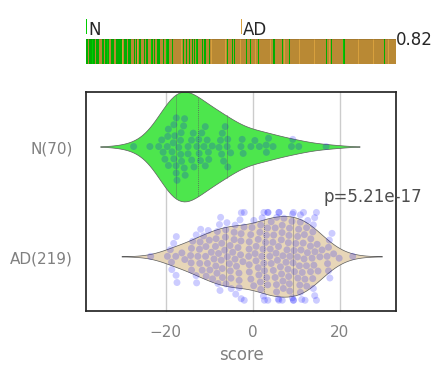

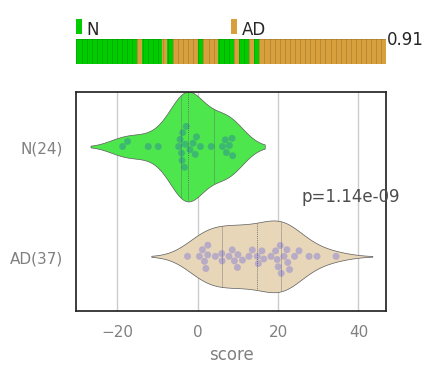

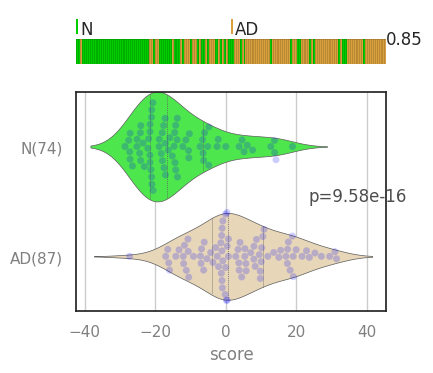

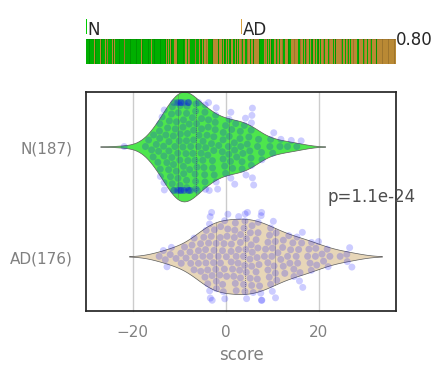

In [12]:
pd = bone.pd
ana = bone.IBDAnalysis()
ana.getFriedman2017()
cls = bone.BIGraph.readClusters("results/ad-net-1-cls.txt")
l2 = set(cls['9705'][1])
l2 = [ana.h.getSimpleName(k) for k in l2]
cl1 = [i for i in l2 if i != "---" and i != ""]
l2 = set(cls['79153'][1] + cls['3055'][1])
l2 = [ana.h.getSimpleName(k) for k in l2]
cl2 = [i for i in l2 if i != "---" and i != ""]
print(len(cl1), len(cl2))

cfile = "results/fried-diff.txt"
high, low = bone.getFdrStats(cfile, 0.05, 1)
print(len(high), len(low))
df = mut.pd.read_csv(cfile, sep="\t", header=None)
df.columns=["ID", "Name", "T", "P", "Diff", "ROC-AUC"]
df.index = df['ID']
low = list(df[(df['Name'].isin(low)) & (df['ROC-AUC'] >0.6)].dropna()['Name'].values)
high = list(df[(df['Name'].isin(high)) & (df['ROC-AUC'] < 0.3)].dropna()['Name'].values)
high = list(set(high).intersection(cl1))
low = list(set(low).intersection(cl2))
print(len(high), len(low))
cfile = "results/webster-diff.txt"
df = mut.pd.read_csv(cfile, sep="\t", header=None)
df.columns=["ID", "Name", "T", "P", "Diff", "ROC-AUC"]
df.index = df['ID']
low = list(df[(df['Name'].isin(low)) & (df['ROC-AUC'] >0.6)].dropna()['Name'].values)
high = list(df[(df['Name'].isin(high)) & (df['ROC-AUC'] <0.3)].dropna()['Name'].values)
print(len(high), len(low))
cfile = "results/patel-diff.txt"
df = mut.pd.read_csv(cfile, sep="\t", header=None)
df.columns=["ID", "Name", "T", "P", "Diff", "ROC-AUC"]
df.index = df['ID']
low = list(df[(df['Name'].isin(low)) & (df['ROC-AUC'] >0.6)].dropna()['Name'].values)
high = list(df[(df['Name'].isin(high)) & (df['ROC-AUC'] <0.3)].dropna()['Name'].values)
print(len(high), len(low))

cfile = "results/fried-diff.txt"
df = mut.pd.read_csv(cfile, sep="\t", header=None)
df.columns=["ID", "Name", "T", "P", "Diff", "ROC-AUC"]
df.index = df['ID']
#low = list(df[(df['Name'].isin(low)) & (df['Diff'] < -0)].dropna()['Name'].values)
#high = list(df[(df['Name'].isin(high)) & (df['Diff'] > 0)].dropna()['Name'].values)
high = list(set(high).intersection(cl1))
low = list(set(low).intersection(cl2))
print(len(high), len(low))
df2 = df[df['Name'].isin(high+low)].sort_values('T')
wt1, l1 = [-1, 1], [df2['Name'][-20:], df2['Name'][:20]]
#wt1, l1 = [-1, 1], [df2['Name'][-7:], low]
#wt1, l1 = [-1, 1], [high, low]

print(len(l1[0]), len(l1[1]))
n1 = max(len(l1[0]), len(l1[1]))
df = pd.DataFrame()
df[wt1[0]] = list(l1[0]) + [None] * (n1 - len(l1[0]))
df[wt1[1]] = list(l1[1]) + [None] * (n1 - len(l1[1]))
df.to_csv("results/model-1.txt", sep="\t", index=False)

df = pd.read_csv("results/model-1.txt", sep="\t")
wt1 = list(pd.to_numeric(df.columns))
l1 = [list(df[k].dropna()) for k in df.columns]

ana = bone.IBDAnalysis()
ana.getFriedman2017()
fig = bone.processData(ana, l1, wt1, None, 1)
ana.getPatel2019(2, 0)
fig = bone.processData(ana, l1, wt1, None, 1)
ana.getLiang2007()
fig = bone.processData(ana, l1, wt1, None, 1)
ana.getWebster2009()
fig = bone.processData(ana, l1, wt1, None, 1)

In [16]:
import bone
reload(bone)
import Datasets
reload(Datasets)
df = bone.ADTrainingAll()
df.to_csv("results/training-performance.txt", sep="\t")

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
[20, 20]
[736, 834]
[2]
[2]
[5]
[4]
[13]
[19, 16]
[24, 11]
[172, 421]
[12, 12]
[9]
[19]
[13, 67]
[3, 29]
[394, 398]
[339]
[400, 540]
[342]
[54, 46]
[30, 34]
[8, 4]
[3, 33]
[37]
[7, 10]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
[1095, 1194]
[7]
[3]
[14]
[4]
[31]
[29, 26]
[52, 21]
[313, 701]
[20, 20]
[14]
[32]
[23, 99]
[3, 39]
[573, 586]
[521]
[716, 896]
[518]
[81, 64]
[58, 63]
[11, 7]
[3, 76]
[61]
[17, 29]
Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
[22, 22]
[807, 897]
[5]
[3]
[4]
[2]
[14]
[16, 20]
[33, 11]
[186, 467]
[18, 18]
[7]

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
[20, 20]


/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


N vs AD -9.72, 5.21e-17
Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
[22, 22]


/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


N vs AD -11.1, 1.1e-24
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
N vs AD -7.29, 1.14e-09


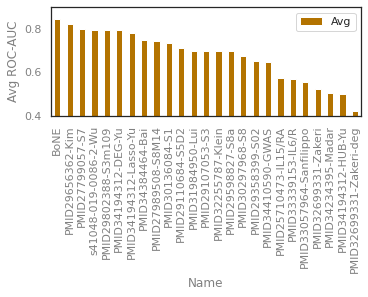

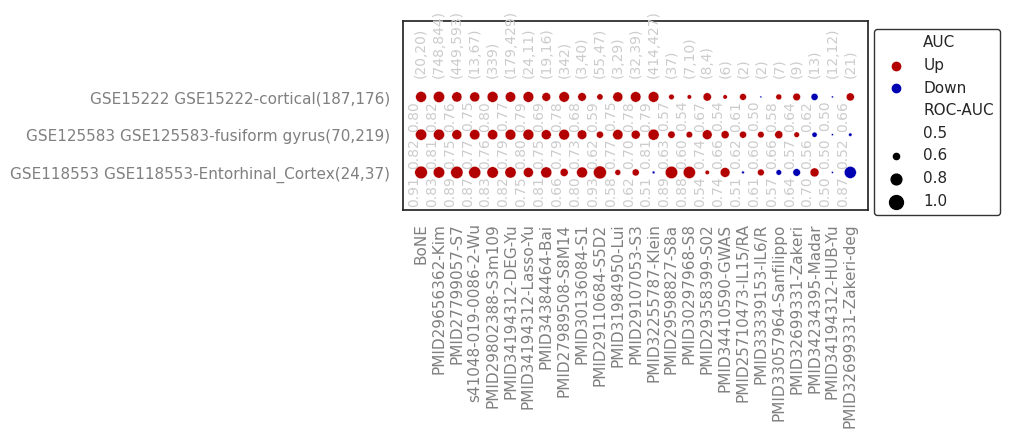

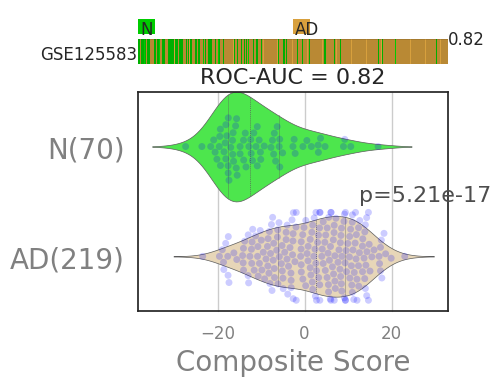

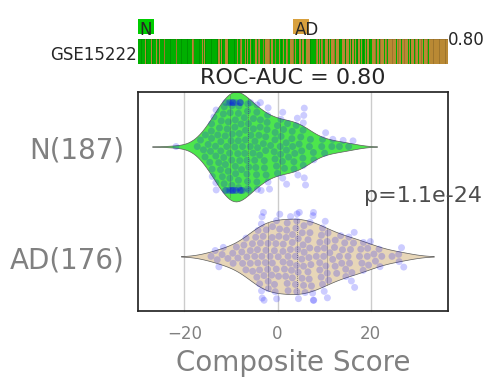

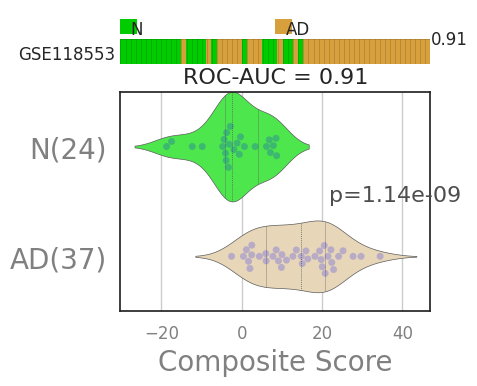

In [67]:
import bone
reload(bone)
import Datasets
reload(Datasets)
pd = bone.pd
sns = bone.sns
sns.set()
sns.set_style("white")
sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
sns.set_context("notebook")
sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['orange', 'blue']])
    
pdf = bone.getPDF("results/training-performance.pdf")
df3 = pd.read_csv("results/training-performance.txt", sep="\t", index_col=0)
res = [k[1].set_index('Signature').reset_index() for k in df3.groupby('Condition')]
df4 = df3.pivot_table(values='ROC-AUC', index=df3.index, 
                     columns='Condition', aggfunc='first')
df4['Avg'] = df4.apply(pd.to_numeric).mean(axis=1)
#df4['Name'] = [df3.iloc[k, df3.columns.get_loc("Signature")] for k in df4.index]
df4['Name'] = df3['Signature'].unique()
df5 = df4.sort_values('Avg', ascending=False)
#df5 = df5.drop(index=0)
ax = df5.plot.bar(x='Name', y='Avg', figsize=(2*25/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')

df6,ax,fig = bone.DP1([k.iloc[df5.index,:].reset_index(drop=True) for k in res])
handles, labels = ax.get_legend_handles_labels()
pdf.savefig(transparent=True,bbox_inches = 'tight')

df = pd.read_csv("results/model-1.txt", sep="\t")
wt1 = list(pd.to_numeric(df.columns))
l1 = [list(df[k].dropna()) for k in df.columns]

ana = bone.IBDAnalysis()
ana.getFriedman2017()
fig = bone.processData(ana, l1, wt1, ana.h.getSource(), 1)
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
ana.printAllPvals()
pdf.savefig(transparent=True,bbox_inches = 'tight')

ana.getWebster2009()
fig = bone.processData(ana, l1, wt1, ana.h.getSource(), 1)
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
ana.printAllPvals()
pdf.savefig(transparent=True,bbox_inches = 'tight')

ana.getPatel2019(2, 0)
fig = bone.processData(ana, l1, wt1, ana.h.getSource(), 1)
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
ana.printAllPvals()
pdf.savefig(transparent=True,bbox_inches = 'tight')

bone.closePDF(pdf)

<a id="bone"></a>
## Validation
[Training](#training) <br>
[Test](#test_1) <br>
[Return](#TOC)

In [24]:
import bone
reload(bone)
import Datasets
reload(Datasets)
df = bone.ADValidationAll()
df.to_csv("results/validation-performance.txt", sep="\t")

Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
[1095, 1194]
[7]
[3]
[14]
[4]
[31]
[29, 26]
[52, 21]
[313, 701]
[20, 20]
[14]
[32]
[23, 99]
[3, 39]
[573, 586]
[521]
[716, 896]
[518]
[81, 64]
[58, 63]
[11, 7]
[3, 76]
[61]
[17, 29]
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
[1095, 1194]
[7]
[3]
[14]
[4]
[31]
[29, 26]
[52, 21]
[313, 701]
[20, 20]
[14]
[32]
[23, 99]
[3, 39]
[573, 586]
[521]
[716, 896]
[518]
[81, 64]
[58, 63]
[11, 7]
[3, 76]
[61]
[17, 29]
Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
161 [74, 87] GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2 AD2
[38, 39]
[1587, 1556]
[3]
[5]
[8]
[4]
[58]
[59, 41]
[41, 32]
[537, 851]
[25, 25]
[10]
[38]
[28, 17

[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10
35 [12, 23] GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10 AD10
[35, 38]
[1668, 1616]
[3]
[4]
[8]
[4]
[51]
[55, 43]
[41, 33]
[508, 816]
[23, 23]
[18]
[45]
[33, 174]
[7, 68]
[798, 966]
[809]
[1366, 1384]
[756]
[144, 99]
[68, 46]
[18, 11]
[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10
36 [14, 22] GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10 AD10
[35, 38]
[1668, 1616]
[3]
[4]
[8]
[4]
[51]
[55, 43]
[41, 33]
[508, 816]
[23, 23]
[18]
[45]
[33, 174]
[7, 68]
[798, 966]
[809]
[1366, 1384]
[756]
[144, 99]
[68, 46]
[18, 11]
[10, 64]
[81]
[26, 38]
Wang 2016 Alz GPL96-97 (n = 951)
GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10
26 [13, 13] GSE84422 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD10 AD10
[35, 38]
[1668, 1616]
[3]
[4]
[8]
[4]
[

[38, 6]
[4, 83]
[88]
[23, 29]
Low 2021 ad (n = 42)
GSE150696 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD31
18 [9, 9] GSE150696 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD31 AD31
[74, 122]
[2999, 3733]
[14]
[15]
[0]
[0]
[28]
[129, 62]
[111, 87]
[1317, 2016]
[12, 12]
[0]
[12]
[63, 416]
[0, 112]
[1644, 1892]
[1575]
[2389, 2738]
[1115]
[459, 153]
[237, 84]
[53, 53]
[14, 170]
[258]
[62, 291]
Dunckley 2006 ad (n = 20)
GSE4757 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD44
20 [10, 10] GSE4757 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD44 AD44
[39, 41]
[1845, 1785]
[3]
[4]
[10]
[4]
[57]
[61, 47]
[45, 34]
[566, 887]
[26, 26]
[19]
[47]
[37, 191]
[9, 72]
[884, 1085]
[883]
[1457, 1507]
[834]
[163, 110]
[78, 47]
[19, 12]
[12, 71]
[91]
[28, 43]
Blalock 2011 ad (n = 30)
GSE28146 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD45
30 [8, 22] GSE28146 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD45 AD45
[39, 41]
[1845, 1785]
[3]
[4]
[10]
[4]
[57]

[51]
[11, 15]
Zhang 2013 VC (n = 230)
GSE44772 GSE44771 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC39.3
230 [129, 101] GSE44772 GSE44771 http://hegemon.ucsd.edu/Tools/explore.php?key=mac&id=MAC39.3 MAC39.3
[21, 21]
[806, 764]
[2]
[2]
[7]
[3]
[16]
[23, 15]
[28, 18]
[255, 524]
[14, 14]
[3]
[16]
[14, 84]
[4, 28]
[394, 425]
[352]
[514, 648]
[362]
[61, 51]
[38, 38]
[10, 5]
[5, 37]
[51]
[11, 15]


Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
23 [13, 10] GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2 AD2
[38, 39]
N vs AD -4.41, 0.000276
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
N vs AD -6.92, 1.69e-09
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.91 1.14e-09
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.86 1.69e-09
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.73 0.00145
P

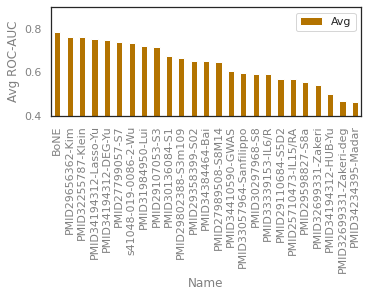

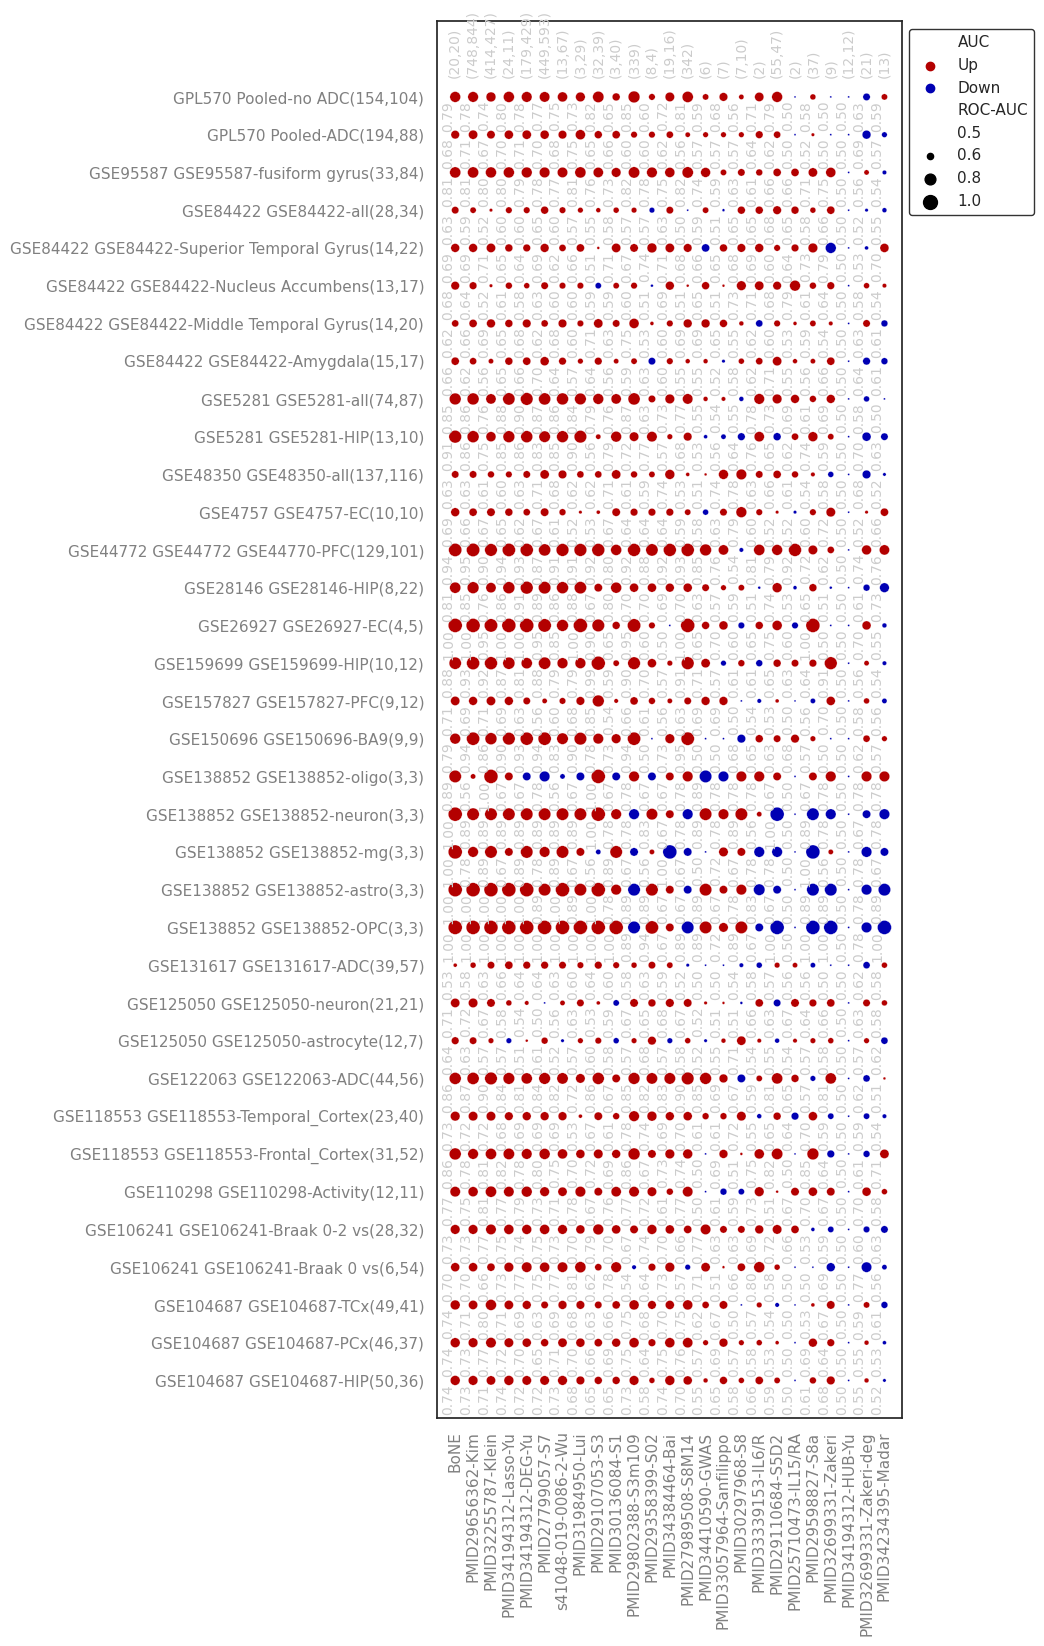

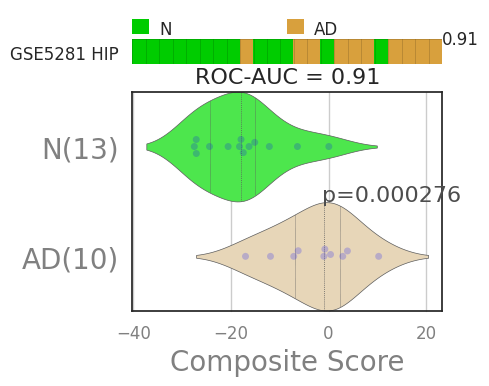

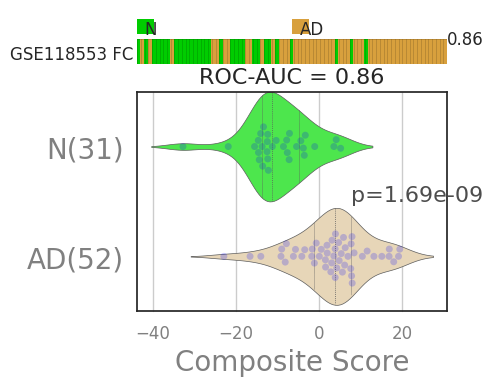

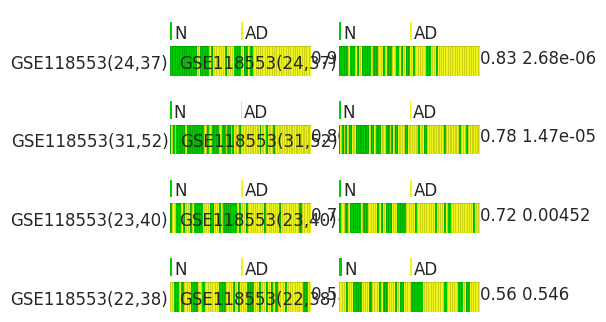

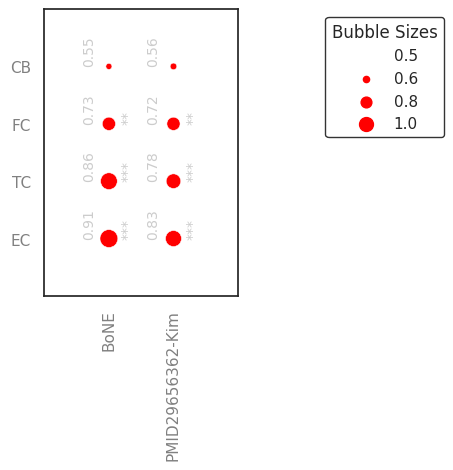

In [76]:
sns = bone.sns
sns.set()
sns.set_style("white")
sns.set_style({'xtick.color':'.5', 'ytick.color':'.5', 'axes.labelcolor': '.5'})
sns.set_context("notebook")
sns.set_palette([bone.adj_light(c, 0.7, 1) for c in ['orange', 'blue']])
    
pdf = bone.getPDF("results/validation-performance.pdf")
df3 = pd.read_csv("results/validation-performance.txt", sep="\t", index_col=0)
ll = ['GSE118553-Frontal_Cortex', 'GSE118553-Temporal_Cortex',
       'GSE5281-all', 'GSE5281-HIP', 'GSE84422-all',
       'GSE84422-Amygdala', 'GSE84422-Nucleus Accumbens',
       'GSE84422-Middle Temporal Gyrus', 'GSE84422-Superior Temporal Gyrus',
       'GSE48350-all', 'GSE106241-Braak 0 vs', 'GSE106241-Braak 0-2 vs',
       'GSE110298-Activity',
       'GSE125050-astrocyte', 'GSE125050-neuron',
       'GSE95587-fusiform gyrus', 'GSE131617-ADC', 'GSE122063-ADC',
       'GSE150696-BA9', 'GSE4757-EC', 'GSE28146-HIP', 'GSE159699-HIP',
       'GSE26927-EC', 'GSE157827-PFC',
       'GSE138852-oligo', 'GSE138852-astro', 'GSE138852-OPC',
       'GSE138852-neuron', 'GSE138852-mg',
       'Pooled-no ADC', 'Pooled-ADC', 'GSE104687-TCx', 'GSE104687-PCx',
       'GSE104687-HIP', 'GSE44772 GSE44770-PFC']
df3 = df3[df3['Condition'].isin(ll)]
#res = np.array_split(df3, df3.shape[0]/25, axis=0)
res = [k[1].set_index('Signature').reset_index() for k in df3.groupby('Condition')]
df4 = df3.pivot_table(values='ROC-AUC', index=df3.index, 
                     columns='Condition', aggfunc='first')
df4['Avg'] = df4.apply(pd.to_numeric).mean(axis=1)
#df4['Name'] = [df3.iloc[k, df3.columns.get_loc("Signature")] for k in df4.index]
df4['Name'] = df3['Signature'].unique()
df5 = df4.sort_values('Avg', ascending=False)
ax = df5.plot.bar(x='Name', y='Avg', figsize=(2*25/9, 2))
ax.set_ylim([0.4, 0.9])
ax.set_ylabel("Avg ROC-AUC")
pdf.savefig(transparent=True,bbox_inches = 'tight')

#df6,ax,fig = adu.DP1([k.reindex(df4.index) for k in res])
df6,ax,fig = bone.DP1([k.iloc[df5.index,:].reset_index(drop=True) for k in res])
pdf.savefig(transparent=True,bbox_inches = 'tight')

df = pd.read_csv("results/model-1.txt", sep="\t")
wt1 = list(pd.to_numeric(df.columns))
l1 = [list(df[k].dropna()) for k in df.columns]

ana = bone.IBDAnalysis()
ana.getLiang2007(2, 1)
fig = bone.processData(ana, l1, wt1, ana.h.getSource() + " HIP", 1)
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
ana.printAllPvals()
pdf.savefig(transparent=True,bbox_inches = 'tight')

ana = bone.IBDAnalysis()
ana.getPatel2019(2, 1)
fig = bone.processData(ana, l1, wt1, ana.h.getSource() + " FC", 1)
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
ana.printAllPvals()
pdf.savefig(transparent=True,bbox_inches = 'tight')

fig,axlist = bone.plt.subplots(ncols=2, nrows=4, figsize=(4,4), dpi=100)
sig = ['BoNE', 'PMID29656362-Kim']
tissue = ['EC', 'TC', 'FC', 'CB']
res = []
for i in range(2):
    wt1, l1, name = bone.getADGeneSet(i)
    for j in range(4):
        ana = bone.IBDAnalysis()
        ana.getPatel2019(2, j)
        ana.orderData(l1, wt1)
        res += [bone.plotTitleBarSingle(ana, axlist[j][i], None) + [i, j]]
        #axlist[j][i].set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
pdf.savefig(transparent=True,bbox_inches = 'tight')

df = pd.DataFrame(res, columns=['ROC-AUC', 'Pval', 'Tval', 'x', 'y'])
fig, ax = plt.subplots(figsize=(2.5, 4*0.7+1), dpi=100)
ax = bone.sns.scatterplot(x='x', y='y', size="ROC-AUC", color='red',
                     sizes = (0, 200), size_norm = (0.5, 1),
                     ax=ax, data=df, legend=False)
for i in range(2):
    for j in range(4):
        ax.text(i-0.2, j, "%.2f" % df['ROC-AUC'][j + 4 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='bottom',  rotation=90)
        ax.text(i + .4, j, bone.getCode(df['Pval'][j + 4 * i]),
                     horizontalalignment='right', size='small', color='0.8',
                     verticalalignment='bottom',  rotation=90)

ax.set_xticks(range(2))
ax.set_xticklabels(sig, rotation=90)
ax.set_yticks(range(4))
ax.set_yticklabels(tissue)

# Custom legend size range
legend_sizes = [0.5, 0.6, 0.8, 1.0]  # Define custom legend values
legend_labels = [f"{s}" for s in legend_sizes]  # Labels
# Manually add legend
handles = [plt.scatter([], [], s=(s-0.5)*200, color='red')
           for s in legend_sizes]
legend = ax.legend(handles, legend_labels, title="Bubble Sizes", bbox_to_anchor=(2.1, 1))
#legend.get_frame().set_facecolor('#FFF7CD')  # Change box color
legend.get_frame().set_edgecolor('black')  # Change border color
ax.set_ylabel("")
ax.set_xlabel("")
ax.grid(False)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 4])
#ax.set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
pdf.savefig(transparent=True,bbox_inches = 'tight')

bone.closePDF(pdf)

In [69]:
len(ll)

35

In [17]:
import bone
reload(bone)
import Datasets
reload(Datasets)
df = bone.ADDatasets()

Friedman 2017 Alz brain RNASeq (n = 289)
GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3
289 [70, 219] GSE125583 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD3 AD3
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
Webster 2009 ad (n = 363)
GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14
363 [187, 176] GSE15222 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD14 AD14
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
Liang 2007 Alz RMA (n = 161)
GSE5281 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD2
161 [74, 87] GSE528

Low 2021 ad (n = 42)
GSE150696 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD31
18 [9, 9] GSE150696 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD31 AD31
Dunckley 2006 ad (n = 20)
GSE4757 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD44
20 [10, 10] GSE4757 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD44 AD44
Blalock 2011 ad (n = 30)
GSE28146 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD45
30 [8, 22] GSE28146 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD45 AD45
Nativio 2020 AD (n = 30)
GSE159699 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad59
22 [10, 12] GSE159699 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad59 ad59
Pascal 2011 AD (n = 118)
GSE26927 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad63
9 [4, 5] GSE26927 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad63 ad63
Nancy 2020 Single-nucleus AD scblk (n = 21)
GSE157827 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad69
21 [9,

In [28]:
ll = ['GSE118553-Frontal_Cortex', 'GSE118553-Temporal_Cortex',
       'GSE5281-all', 'GSE5281-HIP', 'GSE84422-all',
       'GSE84422-Amygdala', 'GSE84422-Nucleus Accumbens',
       'GSE84422-Middle Temporal Gyrus', 'GSE84422-Superior Temporal Gyrus',
       'GSE48350-all', 'GSE106241-Braak 0 vs', 'GSE106241-Braak 0-2 vs',
       'GSE110298-Activity',
       'GSE125050-astrocyte', 'GSE125050-neuron',
       'GSE95587-fusiform gyrus', 'GSE131617-ADC', 'GSE122063-ADC',
       'GSE150696-BA9', 'GSE4757-EC', 'GSE28146-HIP', 'GSE159699-HIP',
       'GSE26927-EC', 'GSE157827-PFC',
       'GSE138852-oligo', 'GSE138852-astro', 'GSE138852-OPC',
       'GSE138852-neuron', 'GSE138852-mg',
       'Pooled-no ADC', 'Pooled-ADC', 'GSE104687-TCx', 'GSE104687-PCx',
       'GSE104687-HIP', 'GSE44772 GSE44770-PFC']
dfv = df[df['Condition'].isin(ll)]
ll = ['GSE125583-fusiform gyrus', 'GSE15222-cortical', 'GSE118553-Frontal_Cortex']
dfv['Type'] = 'Validation'
dft = df[df['Condition'].isin(ll)]
dft['Type'] = 'Training'
df1 = bone.pd.concat([dft, dfv])
df1['nHC'] = df1['n'].str.replace(".([0-9]+),.*", "\\1", regex=True)
df1['nAD'] = df1['n'].str.replace(".*,([0-9]+).$", "\\1", regex=True)
df1 = df1[['GSEID', 'nHC', 'nAD', 'Series',  'Condition', 'Type']]
df1.to_csv("data/datasets.txt", sep="\t", index=False)

/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/mnt/booleanfs2/sahoo/Data/BooleanLab/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Matarin 2015 ad mm (n = 333)
GSE64398 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD62
333 [114, 219] GSE64398 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD62 AD62
[11, 12]
0.52 0.43
Matarin 2015 ad mm (n = 333)
GSE64398 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD62
53 [38, 15] GSE64398 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD62 AD62
[11, 12]
0.88 0.000103
Janssen 2017 APP23 mouse model for Alzheimers disease (n = 24)
GSE80465 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad7
12 [6, 6] GSE80465 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad7 ad7
[19, 20]
0.94 0.00464
Swarup 2018 RNA-seq of TPR50 Tau P301S Transgenic Mouse in different brain regions and time-points GPL13112 (n = 277)
GSE90693 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad17
34 [17, 17] GSE90693 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=ad17 ad17
[19, 20]
1.00 7.9e-08
Rezaie 2021	Bulk RNA-seq_different time point(4,8,12,18 month)_tw

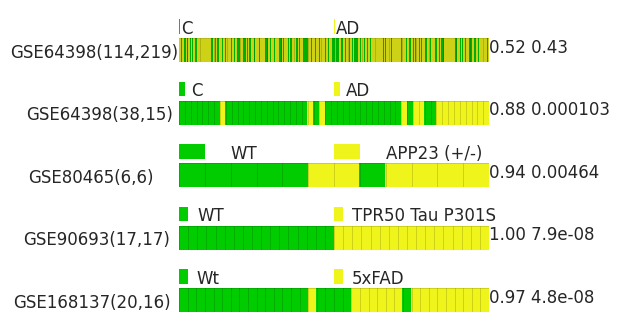

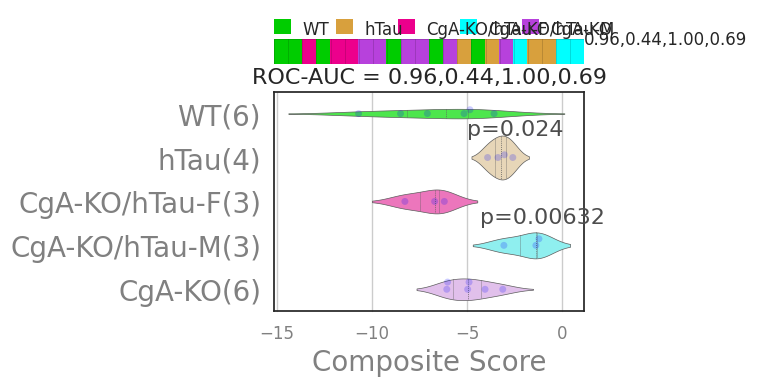

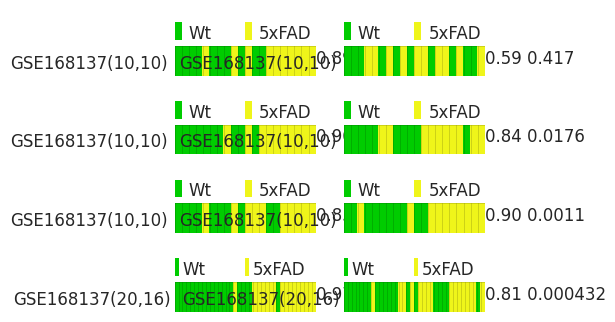

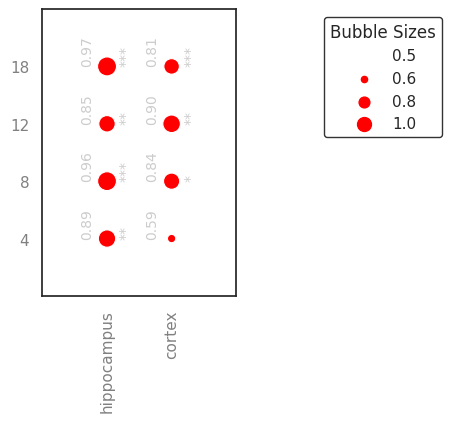

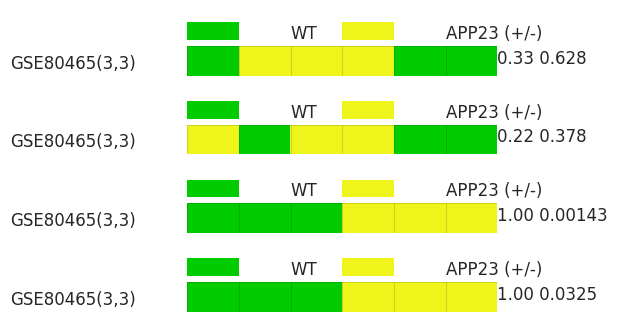

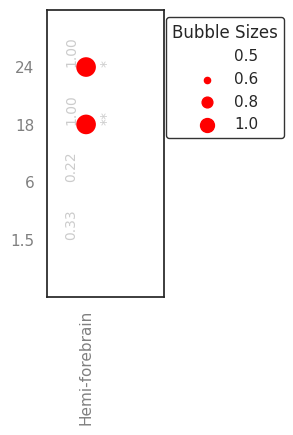

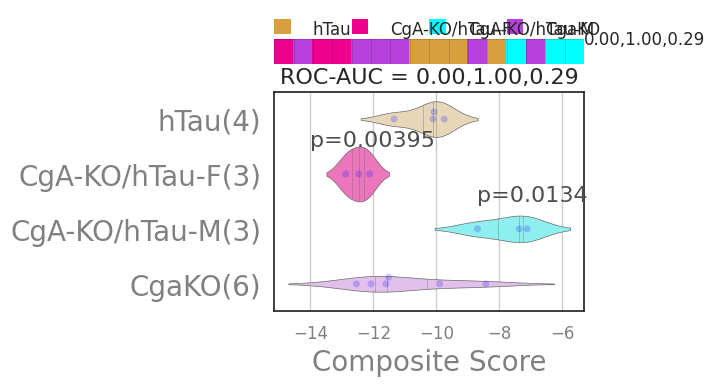

In [96]:
import bone
reload(bone)
import Datasets
reload(Datasets)
plt = bone.plt
wt1, l1, name = bone.getADGeneSet(0)
pdf = bone.getPDF("results/fig-mm.pdf")

fig,axlist = bone.plt.subplots(ncols=1, nrows=5, figsize=(4,4), dpi=100)
res = []
ana = bone.IBDAnalysis()
ana.getMatarin2015Mm(4)
ana.orderData(l1, wt1)
res += bone.plotTitleBarSingle(ana, axlist[0], None)
#axlist[0].set_facecolor('#FFF7CD')
ana.getMatarin2015Mm(3, 2, 0)
ana.orderData(l1, wt1)
res += bone.plotTitleBarSingle(ana, axlist[1], None)
#axlist[1].set_facecolor('#FFF7CD')
ana.getJanssen2017(3)
ana.orderData(l1, wt1)
res += bone.plotTitleBarSingle(ana, axlist[2], None)
#axlist[2].set_facecolor('#FFF7CD')
ana.getSwarup2018(2, 1, 1)
ana.orderData(l1, wt1)
res += bone.plotTitleBarSingle(ana, axlist[3], None)
#axlist[3].set_facecolor('#FFF7CD')
#ana.getPreuss2020(2, '12')
ana.getRezaie2021(2, 'hippocampus', '18')
ana.orderData(l1, wt1)
res += bone.plotTitleBarSingle(ana, axlist[4], None)
#axlist[4].set_facecolor('#FFF7CD')

#fig.patch.set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

ana.getSMps19PFCmmIII(3)
fig = bone.processData(ana, l1, wt1, desc=None, violin=1)
ana.printAllPvals()
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
#fig.patch.set_facecolor('#FFF7CD')
#fig.axes[1].set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

fig,axlist = bone.plt.subplots(ncols=2, nrows=4, figsize=(4,4), dpi=100)
tissue = ['hippocampus', 'cortex']
age = ['4', '8', '12', '18']
res = []
for i in range(2):
    for j in range(4):
        ana = bone.IBDAnalysis()
        ana.getRezaie2021(2, tissue[i], age[j])
        ana.orderData(l1, wt1)
        res += [bone.plotTitleBarSingle(ana, axlist[j][i], None) + [i, j]]
        #axlist[j][i].set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

df = pd.DataFrame(res, columns=['ROC-AUC', 'Pval', 'Tval', 'x', 'y'])
fig, ax = plt.subplots(figsize=(2.5, 4*0.7+1), dpi=100)
ax = bone.sns.scatterplot(x='x', y='y', size="ROC-AUC", color='red',
                     sizes = (0, 200), size_norm = (0.5, 1),
                     ax=ax, data=df, legend=False)
for i in range(2):
    for j in range(4):
        ax.text(i-0.2, j, "%.2f" % df['ROC-AUC'][j + 4 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='bottom',  rotation=90)
        ax.text(i + .4, j, bone.getCode(df['Pval'][j + 4 * i]),
                     horizontalalignment='right', size='small', color='0.8',
                     verticalalignment='bottom',  rotation=90)

ax.set_xticks(range(2))
ax.set_xticklabels(tissue, rotation=90)
ax.set_yticks(range(4))
ax.set_yticklabels(age)

# Custom legend size range
legend_sizes = [0.5, 0.6, 0.8, 1.0]  # Define custom legend values
legend_labels = [f"{s}" for s in legend_sizes]  # Labels
# Manually add legend
handles = [plt.scatter([], [], s=(s-0.5)*200, color='red')
           for s in legend_sizes]
legend = ax.legend(handles, legend_labels, title="Bubble Sizes", bbox_to_anchor=(2.1, 1))
#legend.get_frame().set_facecolor('#FFF7CD')  # Change box color
legend.get_frame().set_edgecolor('black')  # Change border color
ax.set_ylabel("")
ax.set_xlabel("")
ax.grid(False)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 4])
#ax.set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

fig,axlist = bone.plt.subplots(ncols=1, nrows=4, figsize=(4,4), dpi=100)
tissue = ['Hemi-forebrain']
age = ['1.5', '6', '18', '24']
res = []
for j in range(4):
    ana = bone.IBDAnalysis()
    ana.getJanssen2017(2, j)
    ana.orderData(l1, wt1)
    res += [bone.plotTitleBarSingle(ana, axlist[j], None) + [0, j]]
    #axlist[j].set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

df = pd.DataFrame(res, columns=['ROC-AUC', 'Pval', 'Tval', 'x', 'y'])
fig, ax = plt.subplots(figsize=(1.5, 4*0.7+1), dpi=100)
ax = bone.sns.scatterplot(x='x', y='y', size="ROC-AUC", color='red',
                     sizes = (0, 200), size_norm = (0.5, 1),
                     ax=ax, data=df, legend=False)
for i in range(1):
    for j in range(4):
        ax.text(i-0.2, j, "%.2f" % df['ROC-AUC'][j + 4 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='bottom',  rotation=90)
        ax.text(i + .7, j, bone.getCode(df['Pval'][j + 4 * i]),
                     horizontalalignment='right', size='small', color='0.8',
                     verticalalignment='bottom',  rotation=90)

ax.set_xticks(range(1))
ax.set_xticklabels(tissue, rotation=90)
ax.set_yticks(range(4))
ax.set_yticklabels(age)

# Custom legend size range
legend_sizes = [0.5, 0.6, 0.8, 1.0]  # Define custom legend values
legend_labels = [f"{s}" for s in legend_sizes]  # Labels
# Manually add legend
handles = [plt.scatter([], [], s=(s-0.5)*200, color='red')
           for s in legend_sizes]
legend = ax.legend(handles, legend_labels, title="Bubble Sizes", bbox_to_anchor=(2.1, 1))
#legend.get_frame().set_facecolor('#FFF7CD')  # Change box color
legend.get_frame().set_edgecolor('black')  # Change border color
ax.set_ylabel("")
ax.set_xlabel("")
ax.grid(False)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 4])
#ax.set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')
#pdf.savefig(transparent=True, bbox_inches = 'tight', facecolor='#FFF7CD')
pdf.savefig(transparent=True, bbox_inches = 'tight')

pathway = "GOBP_INFLAMMASOME_MEDIATED_SIGNALING_PATHWAY"
wt1, l1 = bone.getMSigDB(pathway)
ana = bone.IBDAnalysis()
ana.getSMps19PFCmmIII(4)
bone.acolor = bone.acolor[1:]
fig = bone.processData(ana, l1, wt1, None, 1)
ana.printAllPvals()
bone.adjustFigure(ana, fig, xlabel="Composite Score", wfactor=2)
pdf.savefig(transparent=True, bbox_inches = 'tight')

bone.closePDF(pdf)

In [42]:
import os
import requests

os.environ['HTTP_PROXY'] = os.environ['http_proxy'] = 'http://localhost:5000/'
os.environ['HTTPS_PROXY'] = os.environ['https_proxy'] = 'http://localhost:5000/'
os.environ['NO_PROXY'] = os.environ['no_proxy'] = '127.0.0.1,localhost,.local'

In [38]:
wt1, l1, name = bone.getADGeneSet(0)

In [44]:
bone.reactome(" ".join(l1[0])).head(20)

,name,count,pValue,fdr
0,Aggrephagy,3,0.000044,0.011049
1,Neurotransmitter receptors and postsynaptic si...,4,0.000327,0.016234
2,Selective autophagy,3,0.000372,0.016234
3,Microtubule-dependent trafficking of connexons...,2,0.000480,0.016234
4,COPI-dependent Golgi-to-ER retrograde traffic,3,0.000495,0.016234
5,COPI-mediated anterograde transport,3,0.000495,0.016234
6,Transport of connexons to the plasma membrane,2,0.000524,0.016234
7,Activation of AMPK downstream of NMDARs,2,0.001133,0.024039
8,Golgi-to-ER retrograde transport,3,0.001259,0.024039
9,RHO GTPases activate IQGAPs,2,0.001268,0.024039


In [53]:
print(', '.join(sorted(l1[0])))

ARF3, CHN1, CRYM, GSTA4, HPRT1, ICA1, LETMD1, MECR, NAP1L5, NCALD, NRN1, PCYOX1L, PRMT8, PSMG1, RGS4, SVOP, TM2D3, TSPAN7, TUBB2A, UBE2N


Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.91 1.14e-09
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
83 [31, 52] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.86 1.69e-09
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
63 [23, 40] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.73 0.00145
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
60 [22, 38] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[36, 31]
0.55 0.586
Patel 2019 Alz (n = 401)
GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8
61 [24, 37] GSE118553 http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD8 AD8
[1095, 1194]
0.83 2.68e-06
Patel 2019 Alz (n = 

(-1.0, 4.0)

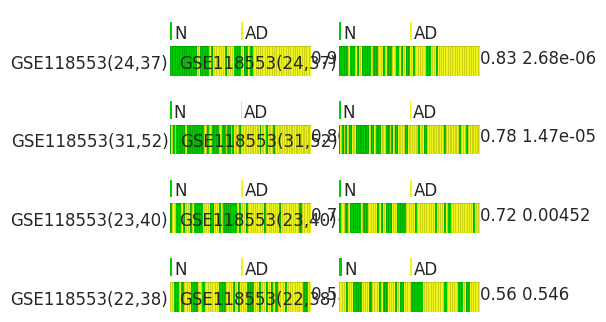

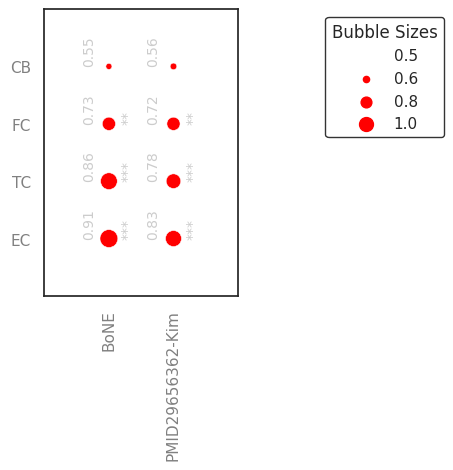

In [75]:
fig,axlist = bone.plt.subplots(ncols=2, nrows=4, figsize=(4,4), dpi=100)
sig = ['BoNE', 'PMID29656362-Kim']
tissue = ['EC', 'TC', 'FC', 'CB']
res = []
for i in range(2):
    wt1, l1, name = bone.getADGeneSet(i)
    for j in range(4):
        ana = bone.IBDAnalysis()
        ana.getPatel2019(2, j)
        ana.orderData(l1, wt1)
        res += [bone.plotTitleBarSingle(ana, axlist[j][i], None) + [i, j]]
        #axlist[j][i].set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')

df = pd.DataFrame(res, columns=['ROC-AUC', 'Pval', 'Tval', 'x', 'y'])
fig, ax = plt.subplots(figsize=(2.5, 4*0.7+1), dpi=100)
ax = bone.sns.scatterplot(x='x', y='y', size="ROC-AUC", color='red',
                     sizes = (0, 200), size_norm = (0.5, 1),
                     ax=ax, data=df, legend=False)
for i in range(2):
    for j in range(4):
        ax.text(i-0.2, j, "%.2f" % df['ROC-AUC'][j + 4 * i],
                    horizontalalignment='right', size='small', color='0.8',
                    verticalalignment='bottom',  rotation=90)
        ax.text(i + .4, j, bone.getCode(df['Pval'][j + 4 * i]),
                     horizontalalignment='right', size='small', color='0.8',
                     verticalalignment='bottom',  rotation=90)

ax.set_xticks(range(2))
ax.set_xticklabels(sig, rotation=90)
ax.set_yticks(range(4))
ax.set_yticklabels(tissue)

# Custom legend size range
legend_sizes = [0.5, 0.6, 0.8, 1.0]  # Define custom legend values
legend_labels = [f"{s}" for s in legend_sizes]  # Labels
# Manually add legend
handles = [plt.scatter([], [], s=(s-0.5)*200, color='red')
           for s in legend_sizes]
legend = ax.legend(handles, legend_labels, title="Bubble Sizes", bbox_to_anchor=(2.1, 1))
#legend.get_frame().set_facecolor('#FFF7CD')  # Change box color
legend.get_frame().set_edgecolor('black')  # Change border color
ax.set_ylabel("")
ax.set_xlabel("")
ax.grid(False)
ax.set_xlim([-1, 2])
ax.set_ylim([-1, 4])
#ax.set_facecolor('#FFF7CD')
#fig.patch.set_facecolor('#FFF7CD')

In [91]:
[(ana.h.headers[i], ana.atype[i]) for i in ana.i1]

[('D5_S86', 'WT'),
 ('A4_S204', 'CgA-KO/hTau-F'),
 ('D4_S207', 'WT'),
 ('C2_S121', 'CgaKO'),
 ('A5_S83', 'CgA-KO/hTau-F'),
 ('A6_S81', 'CgA-KO/hTau-F'),
 ('C4_S206', 'CgaKO'),
 ('C6_S83', 'CgaKO'),
 ('C3_S37', 'CgaKO'),
 ('B3_S36', 'hTau'),
 ('D2_S122', 'WT'),
 ('D1_S59', 'WT'),
 ('D6_S84', 'WT'),
 ('B4_S205', 'hTau'),
 ('B6_S82', 'hTau'),
 ('C5_S85', 'CgaKO'),
 ('B5_S84', 'hTau'),
 ('D3_S38', 'WT'),
 ('A2_S119', 'CgA-KO/hTau-M'),
 ('C1_S58', 'CgaKO'),
 ('A3_S35', 'CgA-KO/hTau-M'),
 ('A1_S56', 'CgA-KO/hTau-M')]

Mahata 2024 ad pfc mm PS19 Chga-KO III (n = 24)
Mahata http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD55.11
16 [4, 3, 3, 6] Mahata http://hegemon.ucsd.edu/Tools/explore.php?key=ad&id=AD55.11 AD55.11
[38]
hTau vs CgA-KO/hTau-F 5.24, 0.00395
hTau vs CgA-KO/hTau-M -4.31, 0.0134
hTau vs CgaKO 0.953, 0.371
CgA-KO/hTau-F vs CgA-KO/hTau-M -8.87, 0.00408
CgA-KO/hTau-F vs CgaKO -2.21, 0.0686
CgA-KO/hTau-M vs CgaKO 4.1, 0.00494


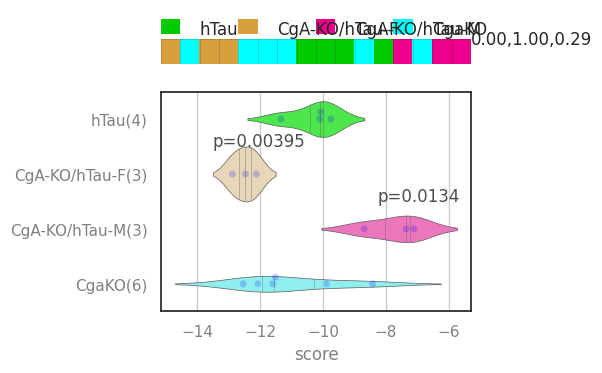

In [93]:
import bone
reload(bone)
import Datasets
reload(Datasets)
#wt1, l1, name = bone.getADGeneSet(0)
wt1, l1 = [1], [['TYROBP', 'FCER1G']]
pathway = "GOBP_INFLAMMASOME_MEDIATED_SIGNALING_PATHWAY"
wt1, l1 = bone.getMSigDB(pathway)
ana = bone.IBDAnalysis()
#ana.getPatel2019(2, 0)
#ana.getLiang2007(2, 1)
#ana.getPatel2019(2, 1)
ana.getSMps19PFCmmIII(4)
fig = bone.processData(ana, l1, wt1, None, 1)
ana.printAllPvals()

<a id="test_1"></a>
### Test
[AD Analysis](#TOC) <br/>
[BoNE](#bone)

In [63]:
hu = bone.hu
reload(hu)
db = hu.Database("/booleanfs2/sahoo/Hegemon/explore.conf")
#db = hu.Database("/Users/aglina/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/sataheri/public_html/Hegemon/explore.conf")
#db = hu.Database("/Users/mgosztyl/public_html/Hegemon/explore.conf")
dbid = "AD22"
h = hu.Hegemon(db.getDataset(dbid))
h.init()
h.initPlatform()
h.initSurv()
title = h.getTitle()
print (title)
atype = h.getSurvName('c cell type')
btype = h.getSurvName('c diagnosis')
atype = [ f"{atype[k]}-{btype[k]}" for k in range(len(atype))]
#atype = [re.sub(" at.*", "", str(k)) for k in atype]
#atype = [str(k).split(" ")[2] if len(str(k).split(" ")) > 2 else k for k in atype]
hu.uniq(atype)
#h.survhdrs

Srinivasan 2020 sfg cell types (GSE125050; n = 113)


['8-9',
 'c cell type-c diagnosis',
 'myeloid-Control',
 'astrocyte-Control',
 'neuron-AD',
 'endothelial-AD',
 'neuron-Control',
 'myeloid-AD',
 'endothelial-Control',
 'astrocyte-AD']